In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Meas = Base.classes.measurement
Stat = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
inspector = inspect(engine)

In [12]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.

session.query(Meas.date).order_by(Meas.date.desc()).first()

('2017-08-23')

Query Date:  2016-08-23


<AxesSubplot:xlabel='date'>

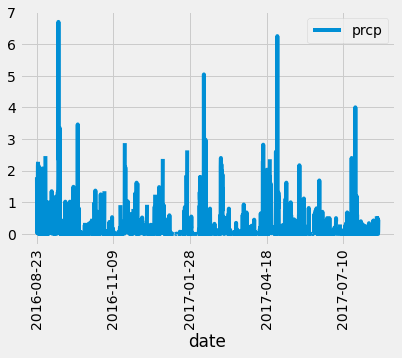

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

# Perform a query to retrieve the date and precipitation scores
results=session.query(Meas.date,Meas.prcp).filter(Meas.date>=query_date).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column
result2=pd.DataFrame(results)
result2=result2.set_index('date')
result2

# Sort the dataframe by date
sort_date=result2.sort_values('date')
sort_date

# Use Pandas Plotting with Matplotlib to plot the data

sort_date.plot(rot=90)


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_date.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Stat.station)).all()


[(9)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Meas.station,func.count(Meas.station)).group_by(Meas.station).\
              order_by(func.count(Meas.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#find temp,max, min

session.query(func.min(Meas.tobs),func.max(Meas.tobs), func.avg(Meas.tobs)).\
    filter(Meas.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Last Date for Max_Temp_Observed: ('2017-08-18',)
Query Date:  2016-08-23


,TOBS
Date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0


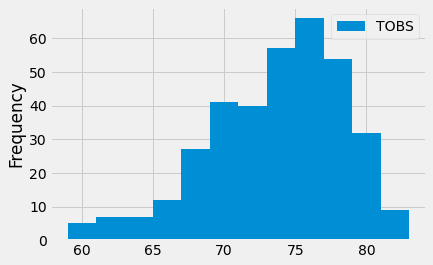

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = session.query(Meas.date).\
    filter(Meas.station == 'USC00519281').\
    order_by(Meas.date.desc()).first()
print("Last Date for Max_Temp_Observed:", last_date)

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

#observe=session.query(Meas.date,Meas.prcp).filter(Meas.date>=query_date).all()
#observe

last_twelve= session.query(Meas.date,Meas.tobs).\
    filter(Meas.station == 'USC00519281').\
    filter(Meas.date >= '2016-08-18').\
    order_by(Meas.date.desc()).all()

# Saved the query results as a Pandas DataFrame and set the index to the date column
observation_df = pd.DataFrame(last_twelve[:], columns=['Date', 'TOBS'])\
    .replace(to_replace='None', value=np.nan).dropna()
observation_df.head(10)

# Sorted the dataframe by date
max_tobs_df = observation_df.sort_values('Date').set_index('Date')
max_tobs_df.plot(kind='hist', bins=12)
max_tobs_df.head()

# Close session

In [29]:
# Close Session
session.close()